In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt                       
import seaborn as sns
import plotly.express as px 

In [2]:
train=pd.read_csv('../Datasets/train_kaggle.csv')
test=pd.read_csv('../Datasets/test_kaggle.csv')

main_train_backup=pd.read_csv('../Datasets/train_kaggle.csv',index_col='Customer_ID')
main_test_backup=pd.read_csv('../Datasets/test_kaggle.csv',index_col='Customer_ID')

C:\Users\Asus\AppData\Local\Temp\ipykernel_40672\235452377.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv('../Datasets/train_kaggle.csv')
C:\Users\Asus\AppData\Local\Temp\ipykernel_40672\235452377.py:4: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  main_train_backup=pd.read_csv('../Datasets/train_kaggle.csv',index_col='Customer_ID')


In [3]:
luxury_sales_non_numeric_rows = train[pd.to_numeric(train['luxury_sales'], errors='coerce').isna()]
fresh_sales_non_numeric_rows = train[pd.to_numeric(train['fresh_sales'], errors='coerce').isna()]
dry_sales_non_numeric_rows = train[pd.to_numeric(train['dry_sales'], errors='coerce').isna()]

print("Rows where 'luxury_sales' contains non-numeric values:")
print(luxury_sales_non_numeric_rows)

print("\nRows where 'fresh_sales' contains non-numeric values:")
print(fresh_sales_non_numeric_rows)

print("\nRows where 'dry_sales' contains non-numeric values:")
print(dry_sales_non_numeric_rows)

Rows where 'luxury_sales' contains non-numeric values:
        Customer_ID             outlet_city  \
4234     10101878.0  Dehiwala-Mount Lavinia   
4333     10361798.0                   Kotte   
5375     10556752.0                Moratuwa   
5408     10321643.0              Peliyagoda   
78367    10424117.0                   Kotte   
78380    10343473.0              Peliyagoda   
80043    10774052.0                Kelaniya   
174628   10207785.0                Kelaniya   
175278   10347733.0              Peliyagoda   
296621   10215937.0                Panadura   
297911   10189925.0                Kelaniya   
326593   10467590.0            Nuwara Eliya   
327258   10615996.0                Kelaniya   
327259   10346205.0  Dehiwala-Mount Lavinia   
327260   10722463.0            Nuwara Eliya   
327261   10221069.0                Panadura   
329847   10328520.0                 Wattala   
329848   10155003.0                Homagama   
329849   10600486.0                   Kotte   
35229

In [4]:
luxury_sales_non_numeric_rows = test[pd.to_numeric(test['luxury_sales'], errors='coerce').isna()]
fresh_sales_non_numeric_rows = test[pd.to_numeric(test['fresh_sales'], errors='coerce').isna()]
dry_sales_non_numeric_rows = test[pd.to_numeric(test['dry_sales'], errors='coerce').isna()]

print("Rows where 'luxury_sales' contains non-numeric values:")
print(luxury_sales_non_numeric_rows)

print("\nRows where 'fresh_sales' contains non-numeric values:")
print(fresh_sales_non_numeric_rows)

print("\nRows where 'dry_sales' contains non-numeric values:")
print(dry_sales_non_numeric_rows)

Rows where 'luxury_sales' contains non-numeric values:
      Customer_ID   outlet_city                       luxury_sales  \
6           10364    batticaloa   Seven Hundread and sixty Ruppees   
6299         4059  Anuradhapura  Eight Hundread and fifteen ruppes   

     fresh_sales dry_sales  
6          914.4    3352.8  
6299     1548.69    5705.7  

Rows where 'fresh_sales' contains non-numeric values:
       Customer_ID outlet_city luxury_sales            fresh_sales dry_sales
13949        28662      Jaffna      2195.84  Nine thousand ruppess   1509.64

Rows where 'dry_sales' contains non-numeric values:
       Customer_ID outlet_city luxury_sales fresh_sales  \
40746        28664     Wattala       3838.6      3951.5   

                                   dry_sales  
40746  Three Thousand seven hundread ruppees  


In [5]:
# Mapping dictionary for specific textual representations to numbers
text_to_number_mapping = {
    'one thousand four hundread ruppes': 1400,
    'eight hundread ruppess': 800,
    'six hundread and hirty ': 630,
    'thousand tow hundread ': 1200,
    'seven hundread and nine ruppees': 709,
    'three thousand two hundread ruppess': 3200,
    'six hundread and thirty': 630,
    'six hundread and five ruppes': 605,
    'three thousana and five hundread': 3500,
    'thirteen thousand ruppes': 13000,
    'five thousand ruppes': 5000,
    'two thousand seven hundread ruppess': 2700,
    'four thousand one hundread ruppess': 4100,
    'four thousand and two hundread ruppes': 4200,
    'seven hundread and sixty ruppees' : 760,
    'eight hundread and fifteen ruppes' : 815,
    'nine thousand ruppess' : 9000,
    'three thousand seven hundread ruppees' : 3700
}

# Function to convert specific textual representations to numbers
def text_to_number(text):
    if pd.isna(text):
        return text
    if isinstance(text, str):
        text = text.lower()
        if text == 'nul':
            return float('nan')  # Convert 'nul' to NaN
        return text_to_number_mapping.get(text, text)
    else:
        return text

In [6]:
train['luxury_sales'] = train['luxury_sales'].apply(text_to_number)
train['fresh_sales'] = train['fresh_sales'].apply(text_to_number)
train['dry_sales'] = train['dry_sales'].apply(text_to_number)

test['luxury_sales'] = test['luxury_sales'].apply(text_to_number)
test['fresh_sales'] = test['fresh_sales'].apply(text_to_number)
test['dry_sales'] = test['dry_sales'].apply(text_to_number)

In [7]:
def get_numerical_summary(df):
    total = train.shape[0]
    missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = train[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

get_numerical_summary(train)

Customer_ID : 2 (0.0%)
outlet_city : 2 (0.0%)
luxury_sales : 38 (0.005%)
fresh_sales : 45 (0.006%)
dry_sales : 37 (0.005%)
cluster_catgeory : 1 (0.0%)


{'Customer_ID': 0.00025834619682105003,
 'outlet_city': 0.00025834619682105003,
 'luxury_sales': 0.0049085777395999515,
 'fresh_sales': 0.005812789428473626,
 'dry_sales': 0.0047794046411894255,
 'cluster_catgeory': 0.00012917309841052501}

In [8]:
print(train['outlet_city'].value_counts())
print(test['outlet_city'].value_counts())

train['outlet_city'] = train['outlet_city'].str.lower()
test['outlet_city'] = test['outlet_city'].str.lower()
test['outlet_city'].value_counts()

test.outlet_city[test.outlet_city=='trincomale']='trincomalee'
train['cluster_catgeory'].value_counts()

train['cluster_catgeory'] = train['cluster_catgeory'].astype(str)
train['cluster_catgeory'] = train['cluster_catgeory'].str.strip().str.replace('\\', '')
train['cluster_catgeory'] = train['cluster_catgeory'].replace(['100.0', '98', '95', '89.0', '99'], np.nan)
train['cluster_catgeory'] = pd.to_numeric(train['cluster_catgeory'], errors='coerce')
cluster_category_counts = train['cluster_catgeory'].value_counts()
train = train.dropna()

print(cluster_category_counts)


outlet_city
Colombo                   41031
Batticaloa                41012
Galle                     41010
Kalmunai                  40711
Negombo                   40703
Jaffna                    40675
Katunayake                40649
Kandy                     40534
Trincomalee               40528
Gampaha                   40252
Peliyagoda                37151
Nuwara Eliya              37102
Dehiwala-Mount Lavinia    36839
Kotte                     36788
Panadura                  36726
Wattala                   36721
Kaduwela                  36695
Homagama                  36639
Moratuwa                  36417
Kelaniya                  35970
Name: count, dtype: int64
outlet_city
Jaffna                    2226
Gampaha                   2198
Katunayake                2157
Negombo                   2129
Kandy                     2101
Colombo                   2092
Dehiwala-Mount Lavinia    1981
Nuwara Eliya              1963
Kaduwela                  1943
Wattala                   1938


C:\Users\Asus\AppData\Local\Temp\ipykernel_40672\849757864.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test.outlet_city[test.outlet_city=='trincomale']='trincomalee'
C:\Users\Asus\AppData\Local\Temp\ipykernel_40672\849757864.py:8: Se

cluster_catgeory
1.0    188984
4.0    172439
6.0    169215
2.0    155064
3.0     48907
5.0     39540
Name: count, dtype: int64


In [9]:
train.outlet_city.unique()

array(['kelaniya', 'moratuwa', 'wattala', 'homagama',
       'dehiwala-mount lavinia', 'panadura', 'kaduwela', 'peliyagoda',
       'kotte', 'nuwara eliya', 'batticaloa', 'colombo', 'jaffna',
       'gampaha', 'kalmunai', 'galle', 'katunayake', 'negombo',
       'trincomalee', 'kandy'], dtype=object)

In [10]:
test.outlet_city.unique()

array(['batticaloa', 'colombo', 'dehiwala-mount lavinia', 'anuradhapura',
       'galle', 'gampaha', 'homagama', 'jaffna', 'kaduwela', 'kalmunai',
       'kandy', 'katunayake', 'kelaniya', 'madawachiya', 'kotte',
       'moratuwa', 'negombo', 'nuwara eliya', 'panadura', 'peliyagoda',
       'trincomalee', 'wattala'], dtype=object)

In [11]:
train['Customer_ID'] = train['Customer_ID'].astype(int)
train['luxury_sales'] = train['luxury_sales'].astype(float)
train['fresh_sales'] = train['fresh_sales'].astype(float)
train['dry_sales'] = train['dry_sales'].astype(float)

new_category = ['madawachiya', 'anuradhapura']
train['outlet_city'] = train['outlet_city'].astype('category')
train['outlet_city'] = train['outlet_city'].cat.add_categories(new_category)
train['cluster_catgeory'] = train['cluster_catgeory'].astype('int')

test['Customer_ID'] = test['Customer_ID'].astype(int)
test['luxury_sales'] = test['luxury_sales'].astype(float)
test['fresh_sales'] = test['fresh_sales'].astype(float)
test['dry_sales'] = test['dry_sales'].astype(float)
test['outlet_city'] = test['outlet_city'].astype('category')

In [12]:
train.outlet_city.unique()

['kelaniya', 'moratuwa', 'wattala', 'homagama', 'dehiwala-mount lavinia', ..., 'galle', 'katunayake', 'negombo', 'trincomalee', 'kandy']
Length: 20
Categories (22, object): ['batticaloa', 'colombo', 'dehiwala-mount lavinia', 'galle', ..., 'trincomalee', 'wattala', 'madawachiya', 'anuradhapura']

In [13]:
duplicates_train=train[train.duplicated()].shape[0]
duplicates_test=test[test.duplicated()].shape[0]

print(duplicates_train)
print(duplicates_test)

0
0


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Customer_ID   40749 non-null  int32   
 1   outlet_city   40749 non-null  category
 2   luxury_sales  40749 non-null  float64 
 3   fresh_sales   40749 non-null  float64 
 4   dry_sales     40749 non-null  float64 
dtypes: category(1), float64(3), int32(1)
memory usage: 1.1 MB


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774047 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Customer_ID       774047 non-null  int32   
 1   outlet_city       774047 non-null  category
 2   luxury_sales      774047 non-null  float64 
 3   fresh_sales       774047 non-null  float64 
 4   dry_sales         774047 non-null  float64 
 5   cluster_catgeory  774047 non-null  int32   
dtypes: category(1), float64(3), int32(2)
memory usage: 30.3 MB


In [16]:
from sklearn.model_selection import train_test_split

df = train.drop(columns=['Customer_ID'])
X = df.drop(columns=['cluster_catgeory'])
y = train['cluster_catgeory']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

categorical_columns = ['outlet_city']
num_columns = [ 'luxury_sales', 'fresh_sales', 'dry_sales']

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


# Create a column transformer to apply one-hot encoding
column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), categorical_columns)
], remainder='passthrough')

# pipeline
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', LogisticRegression(multi_class='multinomial', C=0.01, penalty='l1', solver ='saga'))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train_encoded)

# Predict the target values for the test data
y_pred = pipeline.predict(X_test)
y_pred_tra = pipeline.predict(X_train)

# Calculate accuracy score
accuracy_tra = accuracy_score(y_train_encoded, y_pred_tra)
accuracy_te = accuracy_score(y_test_encoded, y_pred)

print("Accuracy Score train:", accuracy_tra)
print("Accuracy Score test:", accuracy_te)

c:\Users\Asus\miniconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy Score train: 0.9443960874430953
Accuracy Score test: 0.9441638137071249


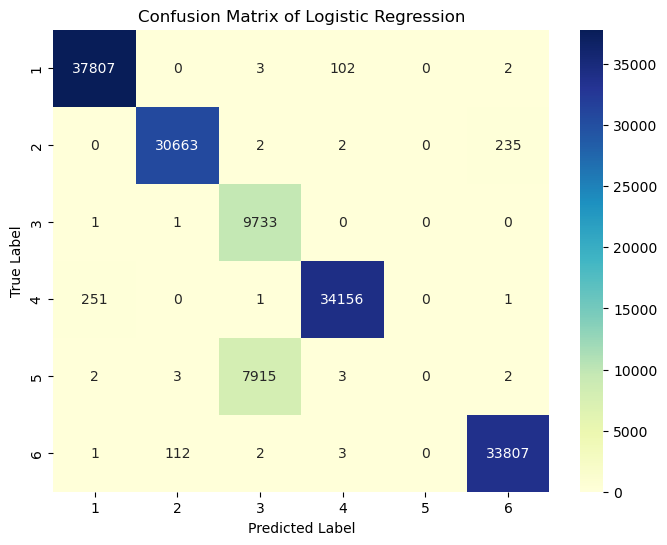

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the customer category labels
category_labels = ['1', '2', '3', '4', '5', '6']

# Get confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=category_labels, yticklabels=category_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

# KNN

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

categorical_columns = ['outlet_city']
num_columns = [ 'luxury_sales', 'fresh_sales', 'dry_sales']

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


# Create a column transformer to apply one-hot encoding
column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(categories=[city_outlets_list]), categorical_columns)
], remainder='passthrough')

# pipeline
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', KNeighborsClassifier())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train_encoded)

# Predict the target values for the test data
y_pred = pipeline.predict(X_test)
y_pred_tra = pipeline.predict(X_train)

# Calculate accuracy score
accuracy_tra = accuracy_score(y_train_encoded, y_pred_tra)
accuracy_te = accuracy_score(y_test_encoded, y_pred)

print("Accuracy Score train:", accuracy_tra)
print("Accuracy Score test:", accuracy_te)

KeyboardInterrupt: 

# Random Forrest Classifier

In [25]:
city_outlets_list=list(set(X_train.outlet_city))

In [109]:
city_outlets_list=train.outlet_city.cat.categories

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

categorical_columns = ['outlet_city']
num_columns = [ 'luxury_sales', 'fresh_sales', 'dry_sales']

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


# Create a column transformer to apply one-hot encoding
column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(categories=[city_outlets_list]), categorical_columns)
], remainder='passthrough')

# pipeline
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', RandomForestClassifier(criterion="gini", max_depth=8, min_samples_split=10, random_state=100))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train_encoded)

# Predict the target values for the test data
y_pred = pipeline.predict(X_test)
y_pred_tra = pipeline.predict(X_train)

# Calculate accuracy score
accuracy_tra = accuracy_score(y_train_encoded, y_pred_tra)
accuracy_te = accuracy_score(y_test_encoded, y_pred)

print("Accuracy Score train:", accuracy_tra)
print("Accuracy Score test:", accuracy_te)

Accuracy Score train: 1.0
Accuracy Score test: 0.9997674568826304


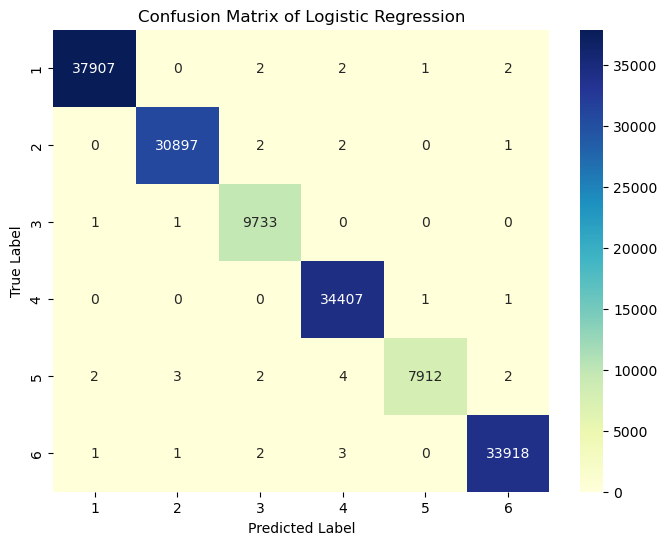

In [27]:
# Define the customer category labels
category_labels = ['1', '2', '3', '4', '5', '6']

# Get confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=category_labels, yticklabels=category_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

# XGBoost Classifier

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score

categorical_columns = ['outlet_city']
num_columns = [ 'luxury_sales', 'fresh_sales', 'dry_sales']

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


# Create a column transformer to apply one-hot encoding
column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(categories=[city_outlets_list]), categorical_columns)
], remainder='passthrough')

# pipeline
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', xgb.XGBClassifier(random_state=100))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train_encoded)

# Predict the target values for the test data
y_pred = pipeline.predict(X_test)
y_pred_tra = pipeline.predict(X_train)

# Calculate accuracy score
accuracy_tra = accuracy_score(y_train_encoded, y_pred_tra)
accuracy_te = accuracy_score(y_test_encoded, y_pred)

print("Accuracy Score train:", accuracy_tra)
print("Accuracy Score test:", accuracy_te)

Accuracy Score train: 0.9998062131300294
Accuracy Score test: 0.9997739164136684


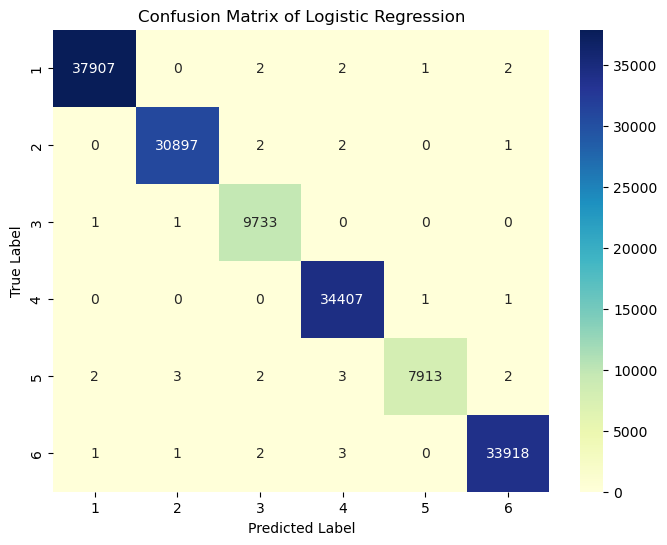

In [31]:
# Define the customer category labels
category_labels = ['1', '2', '3', '4', '5', '6']

# Get confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=category_labels, yticklabels=category_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [117]:
test_customer_id=test.Customer_ID
X_TEST=test.drop(columns='Customer_ID',axis=1)

In [118]:
X_TEST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   outlet_city   40749 non-null  category
 1   luxury_sales  40749 non-null  float64 
 2   fresh_sales   40749 non-null  float64 
 3   dry_sales     40749 non-null  float64 
dtypes: category(1), float64(3)
memory usage: 995.7 KB


In [170]:
y_pred_test = pipeline.predict(X_TEST)
y_pred_test_final=y_pred_test+1

In [171]:
list(set(y_pred_test_final))

[1, 2, 3, 4, 5, 6]

In [172]:
sub_dict={"Customer_ID":test_customer_id,"cluster_category":y_pred_test_final}
sub6=pd.DataFrame(sub_dict)

In [173]:
sub6.shape

(40749, 2)

In [175]:
sub6.to_csv("../Datasets/sub8.csv",index=False)

In [ ]:
'madawachiya', 'anuradhapura'

In [251]:
mask = test['outlet_city'].isin(['madawachiya', 'anuradhapura'])

In [252]:
#creating new test data
anuradhapura_madavachchi_data=test.loc[mask,:]
anuradhapura_madavachchi_data = anuradhapura_madavachchi_data.drop(columns=['Customer_ID','outlet_city'],axis=1)

In [253]:
anuradhapura_madavachchi_data_train=X_train.drop(columns='outlet_city',axis=1)
anuradhapura_madavachchi_data_train.shape

(625525, 3)

In [254]:
anuradhapura_madavachchi_data_test=X_test.drop(columns='outlet_city',axis=1)
anuradhapura_madavachchi_data_test.shape

(154810, 3)

In [256]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

num_columns = [ 'luxury_sales', 'fresh_sales', 'dry_sales']

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


# Create a column transformer to apply one-hot encoding

# pipeline
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=100))
])

# Fit the pipeline on the training data
pipeline.fit(anuradhapura_madavachchi_data_train, y_train_encoded)

# Predict the target values for the test data
y_pred = pipeline.predict(anuradhapura_madavachchi_data_test)
y_pred_tra = pipeline.predict(anuradhapura_madavachchi_data_train)

# Calculate accuracy score
accuracy_tra = accuracy_score(y_train_encoded, y_pred_tra)
accuracy_te = accuracy_score(y_test_encoded, y_pred)

print("Accuracy Score train:", accuracy_tra)
print("Accuracy Score test:", accuracy_te)

Accuracy Score train: 0.9990871667799048
Accuracy Score test: 0.9501840966345844


In [211]:
y_pred=pipeline.predict(anuradhapura_madavachchi_data)
y_pred=y_pred+1
y_pred

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [223]:
anuradhapura_madavachchi_data_new=test.loc[mask,:]
anuradhapura_madavachchi_data_new=anuradhapura_madavachchi_data_new.drop(columns=['Customer_ID'],axis=1)
anuradhapura_madavachchi_data_new['Labels']=y_pred
anuradhapura_madavachchi_data_new

,outlet_city,luxury_sales,fresh_sales,dry_sales,Labels
6192,anuradhapura,1708.80,3246.72,11107.20,1
6193,anuradhapura,1810.50,3077.85,12673.50,1
6194,anuradhapura,1228.78,1755.40,5880.59,1
6195,anuradhapura,1642.55,2021.60,8339.10,1
6196,anuradhapura,1119.16,1358.98,5515.86,1
...,...,...,...,...,...
26509,madawachiya,1629.42,8272.44,2130.78,2
26510,madawachiya,975.45,4226.95,1170.54,2
26511,madawachiya,741.73,4585.24,1348.60,2
26512,madawachiya,1417.32,7913.37,2125.98,2


In [236]:
X_train['Labels']=y_train
X_TRAIN_FINAL=pd.concat([X_train,anuradhapura_madavachchi_data_new])


In [239]:
y_train=X_TRAIN_FINAL.Labels
X_train=X_TRAIN_FINAL.drop(columns='Labels',axis=1)

In [243]:
y_train.shape

(625525,)

In [244]:
X_train.shape

(625525, 4)

In [245]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score

categorical_columns = ['outlet_city']
num_columns = [ 'luxury_sales', 'fresh_sales', 'dry_sales']

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


# Create a column transformer to apply one-hot encoding
column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(categories=[city_outlets_list]), categorical_columns)
], remainder='passthrough')

# pipeline
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', xgb.XGBClassifier(random_state=100))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train_encoded)

# Predict the target values for the test data
y_pred = pipeline.predict(X_test)
y_pred_tra = pipeline.predict(X_train)

# Calculate accuracy score
accuracy_tra = accuracy_score(y_train_encoded, y_pred_tra)
accuracy_te = accuracy_score(y_test_encoded, y_pred)

print("Accuracy Score train:", accuracy_tra)
print("Accuracy Score test:", accuracy_te)

Accuracy Score train: 0.9998081611446386
Accuracy Score test: 0.9997739164136684


In [246]:
y_pred_test = pipeline.predict(X_TEST)
y_pred_test_final=y_pred_test+1

list(set(y_pred_test_final))

[1, 2, 3, 4, 5, 6]

In [249]:
sub_dict={"Customer_ID":test_customer_id,"cluster_category":y_pred_test_final}
sub9=pd.DataFrame(sub_dict)
sub9.to_csv("../Datasets/Sub9.csv",index=False)